In [19]:
import networkx as nx
import numpy as np


In [20]:
G = nx.DiGraph()
G.add_edges_from([
    (1,2),(2,4),(4,6),(6,8),(8,10),(10,12),(12,17),(12,16),(12,15),(12,14),
    (1,3),(3,5),(5,7),(7,9),(9,11),(11,13),(18,13),(19,13),(20,13),(21,13),
])

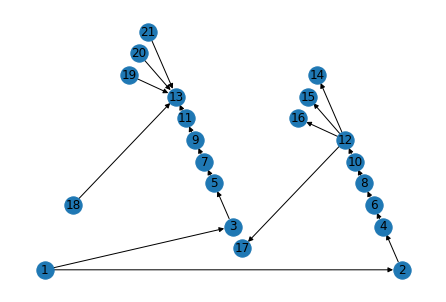

In [38]:
nx.draw_planar(G, with_labels=True)

In [23]:
from lib import get_embeddings, low_pass_filter_kernel
N = len(G.nodes)
S = np.arange(2.0, 20.1, 0.1) 
T = np.arange(1, 11, 1) 
q = 0.02
kernel = low_pass_filter_kernel
c = 2

embeddings = get_embeddings(G, S, T, q)
print(embeddings.shape)

(21, 3620)


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(embeddings)
print(pca.explained_variance_ratio_)

[0.71542494 0.24592967]


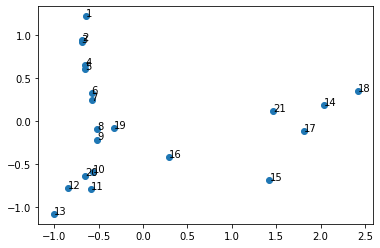

In [37]:
from matplotlib import pyplot as plt
pca_embeddings = pca.transform(embeddings)
fig, ax = plt.subplots(1)
ax.scatter(pca_embeddings[:,0], pca_embeddings[:, 1])
nodes = list(G.nodes)
for n, x, y in zip(nodes, pca_embeddings[:,0], pca_embeddings[:, 1]):
    ax.annotate(n, (x, y))